<img
     img align="left"
     src="src/uni_logo_white.png"
     alt="Universität Bielefeld"
     width="20%"
/>

# Miniproject 10: Meta-Learning with Reptile
#### József Lurvig
*9. March 2023*

## Abstract

The 2018 paper *On First-Order Meta-Learning Algorithms* by *A. Nichol, J. Achiam, J. Schulman* presents an analysis of first-order meta-learning algorithms in a wide range of few-shot learning tasks. In the paper, the authors introduce the Reptile algorithm, a simple yet effective meta-learning algorithm that uses stochastic gradient descent to optimize model weights across multiple tasks.

To evaluate the performance of Reptile and other first-order meta-learning algorithms, the authors conduct experiments on a 1D sine regression problem. The results show that Reptile and other first-order meta-learning algorithms achieve significantly better performance on these tasks than traditional gradient descent and other baseline algorithms.

In this project, the 1D sine regression experiment of Reptile mentioned in the paper was recreated, and the code was extended to a 2D forward kinematics problem. The extension allows for the analysis of the performance of first-order meta-learning algorithms in a more complex, higher-dimensional task. The results of the experiments suggest that first-order meta-learning algorithms can be highly effective in few-shot learning tasks and may have broad applicability in a wide range of domains.

## Background

### Human vs Machine Learning

Machine learning systems have achieved remarkable success in various tasks, but they often require large amounts of data to perform at the same level as humans. Neural networks can be incredibly efficient and fast in completing specific tasks, similar to industrial robots that can repeat the same action with high precision many times a day. However, both neural networks and robots are limited to performing well only in their specific area of expertise. In contrast, humans have a broader range of abilities, even if they may not excel in any single task as much as a specialized AI or robot.

This comparison is somewhat unfair, as humans possess extensive background knowledge encoded in their brains and DNA, while AI algorithms have to start from scratch. Humans don't learn every time from scratch, but they are fine-tuning and recombining a set of pre-existing skills. Researchers such as *Tenenbaum et al.* **[[5](http://proceedings.mlr.press/v27/salakhutdinov12a/salakhutdinov12a.pdf)]** argue that we can explain this difference through Bayesian inference. Improving the Bayesian properties of our algorithms can be challenging, but it may be crucial for advancing AI and machine learning.

Moravec's paradox highlights another phenomenon related to the capabilities of AI-powered tools. Specifically, tasks that humans may perceive as complex can be relatively easy to teach to AI, while tasks that are simple for humans (such as sensorimotor skills) can be quite challenging for robots. **[[7](https://www.thinkautomation.com/bots-and-ai/what-is-moravecs-paradox-and-what-does-it-mean-for-modern-ai/)]**

One significant challenge facing AI is the *generalization gap*, which refers to the difference between what the AI has been trained to do and a new task that it has not encountered before. For instance, an AI may be trained to fold socks or stack cups but struggle when faced with the task of doing dishes. This limitation highlights the need to develop AI that can generalize to a broader range of tasks.

### Meta-learning

Meta-learning is a powerful technique that allows us to leverage experiences from past tasks to learn new ones more quickly. By extracting general heuristics from previous tasks, we can train a fast-learning algorithm that can adapt to new tasks more efficiently. This approach helps address Moravec's paradox, where tasks that are challenging for humans are often easy for machines, and vice versa.

Meta-learning algorithms directly optimize fast-learning algorithms that can quickly adapt to new tasks. We can use a distribution of tasks to create a training set and a test set. The algorithm trains on the training set and produces an agent that performs well on the test set. We can measure the success of the algorithm using a reinforcement reward system, where the faster it learns, the more reward it receives.

In addition to its efficiency, meta-learning also allows us to learn cumulatively over time. By building on our prior knowledge and experiences, we can continually improve our ability to learn new tasks quickly and accurately. This approach has many practical applications in fields such as robotics, natural language processing, and computer vision, where machines need to learn quickly and adapt to new challenges on the fly.

### Model-agnostic meta-learning (MAML)

Model-Agnostic Meta-Learning (MAML) was introduced in 2017 by Chelsea Finn et al. **[[8](https://proceedings.mlr.press/v70/finn17a.html)]** and is open source. The technique aims to train a model's parameters over a sequence of tasks in such a way that a few iterations of gradient descent with only a small amount of training data from a new task will result in good generalization performance. MAML can be used to train models for a variety of tasks, which can then be fine-tuned for specific tasks. The method has been successfully applied to few-shot image classification benchmarks and policy-gradient-based reinforcement learning. **[[3](https://en.wikipedia.org/wiki/Meta_learning_(computer_science))]** Therefore, MAML is a powerful tool for meta-learning that can enhance the performance of machine learning models.

MAML is compatible with any model trained using gradient descent, making it applicable to various learning problems. The primary goal of meta-learning is to train a model on a range of learning tasks so that it can solve new learning tasks using only a small number of training samples. **[[4](https://arxiv.org/abs/1703.03400)]**

The optimization problem of MAML is: find an initial set of parameters $\phi$, such that for a randomly samplet task $\tau$ with corresponding loss $L_{\tau}$ the learner will have low loss after $k$ updates. $U_{\tau}^{k}$ is the operator that updates $\phi$ $k$ times using data sampled from $\tau$. In few-shot learning $U$ corresponds to performing gradient descent on batches of data sampled from $\tau$.
MAML makes an additional assumption: for a given task $\tau$, the inner loop optimization uses training samples $A$, whereas the loss is computed using test samples $B$. This way, MAML optimizes for generalization, akin to cross-validation.

$\underset{\phi}{minimize}𝔼_{\tau}\Big[L_{\tau,B}\big(U_{\tau,A}^{k}(\phi)\big)\Big]$

## Reptile

Reptile is a new first-order gradient-based meta-learning algorithm, that was introduced in in 2018 by Alex Nichol et al. **[[1](https://arxiv.org/abs/1803.02999)]**. The algorithm is designed to learn to quickly adapt to new tasks by using gradient descent to update the model parameters based on a small number of gradient steps on a few training examples from the new task. Reptile has been shown to outperform existing meta-learning algorithms such as MAML on a variety of few-shot learning tasks, including image classification and regression problems.

$\underset{\phi}{minimize}𝔼_{\tau}\Big[L_{\tau}\big(U_{\tau}^{k}(\phi)\big)\Big]$

There are two versions of the Reptile algorithm: the serial and the batched version. In the serial version, the model is trained on a sequence of tasks, and the gradients are accumulated across the tasks to update the model parameters. In contrast, the batched version trains the model on a batch of tasks simultaneously and updates the model parameters with the average gradients across the tasks. Both versions have been shown to be effective in few-shot learning tasks, and the choice between them depends on the specific problem and computational constraints.

#### Reptile algorithm *(serial version)*
> *Initialize $\phi$*                    *initial parameter vector*\
> **for** *i* **do**
> > *Sample $\tau$*                 *$\tau$ : task, $L_{\tau}$ : loss, $\tilde{\phi}$ weight vectors*\
> > *Compute $\tilde{\phi}$*              *$\tilde{\phi} = U_{\tau}^{k}(\phi)$, denoting $k$ steps of SGD or Adam*\
> > *Update $\phi$*                 *$\phi \leftarrow \phi + \epsilon (\tilde{\phi} - \phi)$*
> >
> **end**\
> *Return $\phi$* 

#### Reptile algorithm *(batched version)*
> *Initialize $\phi$*                                                      *vector of initial parameters of the model*\
> *Sample $\tau_{1}, \tau_{2}, \dots, \tau_{n}$*                                 *subset of tasks*\
> **for** $i \leftarrow 1$ **to** $n_{epochs}$ **do**
> > **for** $j \leftarrow 1$ **to** $batch\_size$ **do**
> > > *$W \leftarrow SGD(L_{\tau_{i}}, \phi, k)$*                    *$k$ : number of SGD steps*
> > >
> > **end**\
> > *Update $\phi$*                                                  *$\phi \leftarrow \phi + \frac{\epsilon}{k}\sum_{i=1}^n (W_i - \phi)$*
> >
> **end**\
> *Return $\phi$*

## Case Study: One-Dimensional Sine Wave Regression

In the followings, let's look at the task of a 1D sine wave regression.

1. $f(x) = a\cdot{\sin(x+b)}$, where amplitude $a \sim U([0.1, 5])$ and phase $b \sim U([0, 2\pi])$
1. Sample $x_{1}, x_{2}, \dots, x_{p}$
1. Learner sees $(x_{1}, y_{1}), (x_{2}, y_{2}), \dots, (x_{p}, y_{p})$ and predicts $f(x)$
1. Loss is $L_{\tau}(f) = \int_{-5}^{5}dx||f(x)-f_{\tau}(x)||^{2}$

Note that $\mathbb{E}_{\tau}[f_{\tau}(x)]=0$, due to the random phase $b$.

### Demonstration of MAML and Reptile on a "toy" problem

- few-shot regression
- training on 10 sampled points of random sine wave
- 32 gradient steps
- MLP with layers $1 \to 64 \to 64 \to 1$

| <img src="src/sine_bef.png" width="320"/> | <img src="src/sine_maml.png" width="320"/> | <img src="src/sine_reptile.png" width="320"/> |
| :----: | :----: | :----: |
| After vanilla learning | After MAML training | After Reptile training |

In [ ]:
from torch import nn

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1),
)

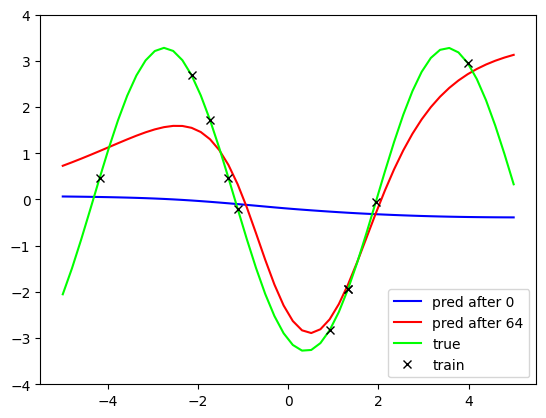

-----------------------------
iteration               1
loss on plotted curve   1.209


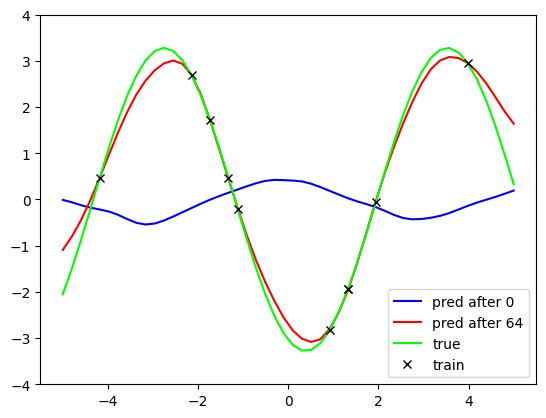

-----------------------------
iteration               10000
loss on plotted curve   0.130


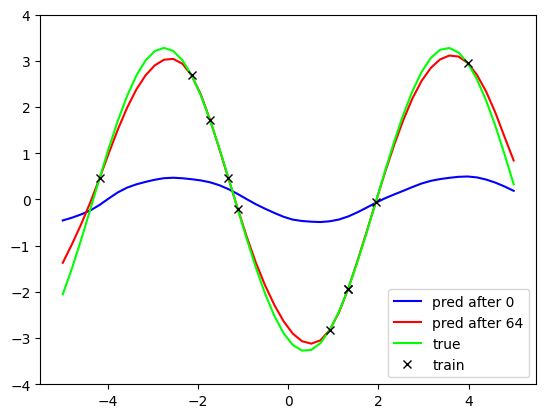

-----------------------------
iteration               20000
loss on plotted curve   0.048


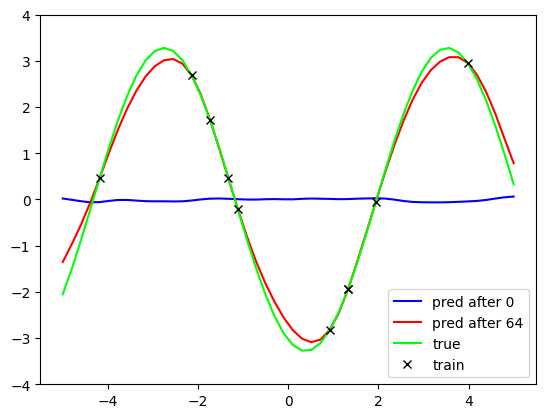

-----------------------------
iteration               30000
loss on plotted curve   0.054


In [5]:
%run reptile-sinewaves-demo.py

| Architecture | Gradient steps | Samples | After 30000 iteration | loss |
| :-: | :-: | :-: | :-: | :-: |
| 1x64x64x1 | 32 | 10 | <img src="src/output-1.png" width="400"/> | 0.016 |
| <span style="color: orange;">1x64x64x64x1</span> | 32 | 10 | <img src="src/output-4.png" width="400"/> | 0.063 |
| 1x64x64x1 | <span style="color: orange;">64</span> | 10 | <img src="src/output-5.png" width="400"/> | 0.054 |
| 1x64x64x1 | 32 | <span style="color: orange;">20</span> | <img src="src/output-6.png" width="400"/> | 0.017 |

Architecture: 1x64x64x1\
Gradient steps: 64\
Samples: 10

<img src="src/output-7.png" width="600"/>\
<img src="src/output-8.png" width="600"/>\
<img src="src/output-9.png" width="600"/>\
<img src="src/output-10.png" width="600"/>\

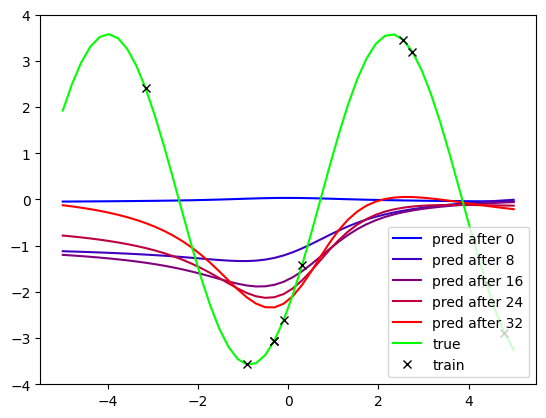

In [7]:
%run vanilla-sinewave.py

## Case Study: FK regression

Replace the sine function by the forward kinematics of a two-link robot arm:
- segment lengths $A ∈ [1, 2]$ and $B ∈ [0.5, 1]$
- joint angles $x_{1}, x_{2} ∈ [−{π\over2}, {π\over2}]$
- end effector coordinates $(y_{1}, y_{2})$ (and no phase)

$y_{1} = A\cdot{\cos(x_{1})} + B\cdot{\cos(x_{1}+x_{2})}$\
$y_{2} = A\cdot{\sin(x_{1})} + B\cdot{\sin(x_{1}+x_{2})}$

Configuration space:

<img src="src/fk-demo-config-space.png" width="50%"/>

A: 1.603m, B: 0.788m
SGD steps: 32
Samples: 100
Grid resolution: 10 cells per meter
-------------------------
pred after 8 : 1.3695244836960412
pred after 16 : 0.9724345582624553
pred after 24 : 0.7540889978702499
pred after 32 : 0.6605447409808958


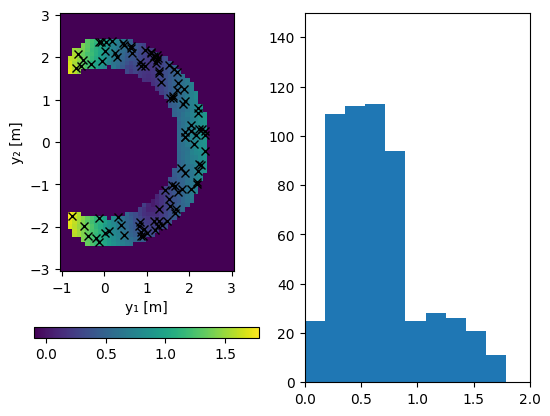

-------------------------
pred after 8 : 0.38749774350006655
pred after 16 : 0.31156336776165683
pred after 24 : 0.27727304114101886
pred after 32 : 0.25544834652799925


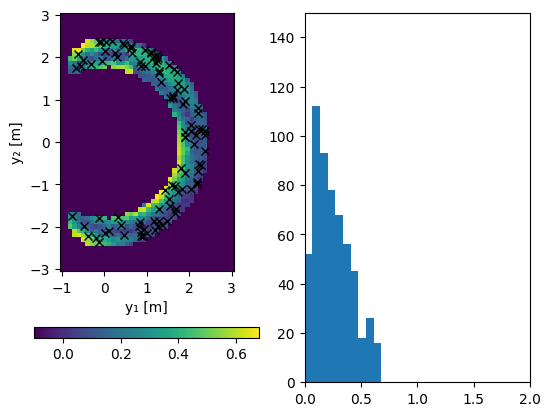

-------------------------
pred after 8 : 0.36600458353287957
pred after 16 : 0.297556393646532
pred after 24 : 0.2666368157666427
pred after 32 : 0.24632469474530153


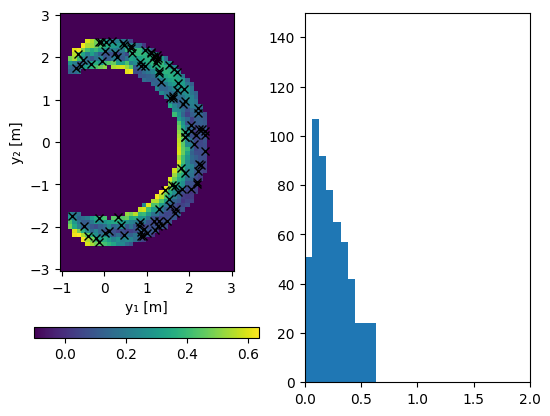

-------------------------
pred after 8 : 0.35965327750327303
pred after 16 : 0.2932054915307202
pred after 24 : 0.2629136983577219
pred after 32 : 0.2430256682432818


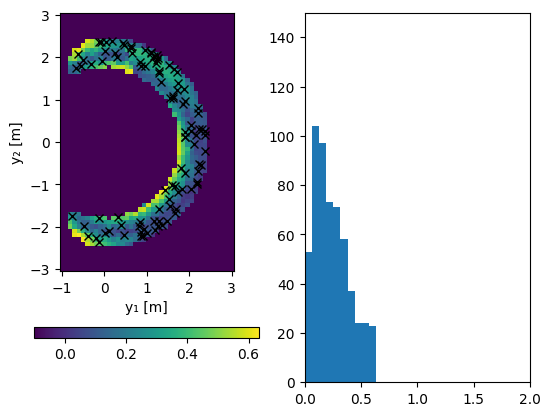

In [9]:
%run reptile-fk-demo.py

| SGD | Samples | Grid | Model | Comment | Mean prediction error after 30'000 iterations|
| :-: | :-: | :-: | :-: | :-: | :-: |
| 32 | 10 | 10 | 2x64x64x2<br/>(Tanh-Tanh) | | 0.4099 |
| 32 | 100 | 10 | 2x64x64x2<br/>(Tanh-Tanh) | | 0.3538 |
| 32 | 100 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-Tanh) | | 0.2912 |
| 32 | 100 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | | 0.2534 |
| 32 | 100 | 50 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | | 0.2096 |
| 64 | 10 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | | 0.9078 |
| 64 | 100 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | | 0.1682 |
| 32 | 10 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | B=0 | 0.3004 |
| 64 | 10 | 10 | 2x64x128x64x2<br/>(Tanh-Tanh-ReLU) | B=0 | 0.3410 |

## Analysis

This project covered the topic of meta-learning in reinforcement learning. I started by introducing the concept of meta-learning and how it can help agents to learn from past experiences and transfer that knowledge to new tasks. Then, I delved into the details of different meta-learning algorithms such as MAML and Reptile, and how they work in the context of reinforcement learning.

I provide a detailed explanation of MAML and how it works to train models on a variety of tasks and then fine-tune them for a specific task. I also described Reptile and how it works as a first-order gradient-based meta-learning algorithm.

Let's explore two possible explanations for why Reptile works.

#### 1. Leading Order Expansion of the Update

The first explanation is based on a leading-order expansion of the update performed by Reptile and MAML. By using a Taylor series expansion, we can approximate the update and identify the leading-order terms that they have in common. The first term minimizes expected loss during joint training, while the second term maximizes within-task generalization.

#### 2. Finding a Point Near All Solution Manifolds

The second explanation suggests that Reptile works by finding a point near all solution manifolds. In other words, Reptile updates the model in a way that brings it closer to the optimal solution of all tasks. This explanation is supported by the observation that Reptile performs well on tasks with varying degrees of similarity.

Overall, these explanations shed light on the underlying mechanisms of Reptile as a powerful meta-learning algorithm.

## Resources
**[1] A. Nichol, J. Achiam, J. Schulman (2018):** *On First-Order Meta-Learning Algorithms*\
**[2] A. Nichol and J. Schulman (2018):** *Reptile: a Scalable Meta-Learning Algorithm*\
**[3] Wikipedia (accessed July 2022):** *[Meta learning (computer science)](https://en.wikipedia.org/wiki/Meta_learning_(computer_science))*\
**[4] C. Finn, P. Abbeel, S. Levine (2017):** *Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks*\
**[5] R. Salakhutdinov, J. Tenenbaum, A. Torralba (2012):** *One-shot learning with a hierarchi- cal nonparametric bayesian model*\
**[6] WIRED (accessed October 2022):** *[Computer Scientist Explains One Concept in 5 Levels of Difficulty](https://youtu.be/raHM3k-uR0E)*\
**[7] ThinkAutomation (accessed October 2022):** *[What is Moravec’s paradox and what does it mean for modern AI?](https://www.thinkautomation.com/bots-and-ai/what-is-moravecs-paradox-and-what-does-it-mean-for-modern-ai/)*\
**[8] C. Finn, P. Abbeel, S. Levine (2017):** *Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks*